# Определение уровня опасности на дорогах
практика по машиному обучению

Импортируем библиотеки

In [1]:
import geopandas as gpd 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os

### Получим обратимся к файлам в нашей папке REGIONS

In [2]:
file_list = os.listdir('./REGIONS')

Проверим результат:

In [3]:
file_list

['altaiskii-krai.geojson',
 'amurskaia-oblast.geojson',
 'arkhangelskaia-oblast.geojson',
 'astrakhanskaia-oblast.geojson',
 'belgorodskaia-oblast.geojson',
 'brianskaia-oblast.geojson',
 'chechenskaia-respublika.geojson',
 'cheliabinskaia-oblast.geojson',
 'chukotskii-avtonomnyi-okrug.geojson',
 'chuvashskaia-respublika-chuvashiia.geojson',
 'evreiskaia-avtonomnaia-oblast.geojson',
 'iamalo-nenetskii-avtonomnyi-okrug.geojson',
 'iaroslavskaia-oblast.geojson',
 'irkutskaia-oblast.geojson',
 'ivanovskaia-oblast.geojson',
 'kabardino-balkarskaia-respublika.geojson',
 'kaliningradskaia-oblast.geojson',
 'kaluzhskaia-oblast.geojson',
 'kamchatskii-krai.geojson',
 'karachaevo-cherkesskaia-respublika.geojson',
 'kemerovskaia-oblast-kuzbass.geojson',
 'khabarovskii-krai.geojson',
 'khanty-mansiiskii-avtonomnyi-okrug-iugra.geojson',
 'kirovskaia-oblast.geojson',
 'kostromskaia-oblast.geojson',
 'krasnodarskii-krai.geojson',
 'krasnoiarskii-krai.geojson',
 'kurganskaia-oblast.geojson',
 'kurska

### Получив доступ к файлу можем поместить его в массив DataFrame
С помощью цикла For перенесём данные из файлов в DataFrame

In [4]:
dfFull = pd.DataFrame()

In [94]:
for i in range(0, len(file_list)):
    df = gpd.read_file("./REGIONS/"+file_list[i])
    dfFull = pd.concat([dfFull, df.head(int(df.shape[0]/10))], ignore_index=True)

C:\Users\sprae\anaconda3\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


KeyboardInterrupt: 

## Проверим полученый результат:

In [6]:
dfFull

,id,gibdd_id,point,severity,region,parent_region,datetime,address,participants_count,injured_count,dead_count,category,light,nearby,vehicles,participants,scheme,geometry
0,2312860,191156006,"{'lat': 53.7754, 'long': 82.6678}",Легкий,Павловский район,Алтайский край,2016-02-16 21:50:00,Барнаул - Камень-на-Оби - граница Новосибирско...,3,1,0,Столкновение,"В темное время суток, освещение отсутствует",[ ],"[ { ""brand"": ""NISSAN"", ""model"": ""Serena"", ""col...",[ ],210,POINT (82.66780 53.77540)
1,2308403,213560316,"{'lat': 53.320377, 'long': 82.917423}",Тяжёлый,Павловский район,Алтайский край,2018-11-03 11:00:00,"Павловск - Ребриха - Буканское, 65 км",4,2,0,Столкновение,Светлое время суток,[ ],"[ { ""brand"": ""ВАЗ"", ""model"": ""ВАЗ 2110, 21101,...",[ ],220,POINT (82.91742 53.32038)
2,2321883,203850213,"{'lat': 51.4528, 'long': 81.1606}",Тяжёлый,Рубцовский район,Алтайский край,2017-02-08 16:50:00,А-322 Барнаул - Рубцовск - граница с Республик...,3,1,0,Столкновение,Светлое время суток,"[ ""Нерегулируемый перекрёсток неравнозначных у...","[ { ""brand"": ""ВАЗ"", ""model"": "" Жигули ВАЗ-210...",[ ],300,POINT (81.16060 51.45280)
3,2489751,220889161,"{'lat': 53.053222, 'long': 83.84285}",Легкий,Первомайский район,Алтайский край,2020-09-11 14:12:00,Фирсово - Бобровка - Рассказиха - Нижняя Петро...,3,1,0,Столкновение,Светлое время суток,"[ ""Нерегулируемый перекрёсток неравнозначных у...","[ { ""brand"": ""TOYOTA"", ""model"": ""Corolla"", ""co...",[ ],430,POINT (83.84285 53.05322)
4,2321602,205535141,"{'lat': 53.1725, 'long': 83.4232}",Тяжёлый,Барнаул,Алтайский край,2017-06-26 14:00:00,"г Барнаул, Объездная дорога в обход г. Барнаул...",2,1,0,Наезд на пешехода,Светлое время суток,"[ ""Эстакада, путепровод"" ]","[ { ""brand"": ""MAZDA"", ""model"": ""Mazda 3"", ""col...","[ { ""health_status"": ""Раненый, находящийся (на...",820,POINT (83.42320 53.17250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103810,2566093,221364479,"{'lat': 52.368479, 'long': 115.527195}",Тяжёлый,Тунгокоченский район,Забайкальский край,2021-04-05 15:20:00,"пгт Вершино-Дарасунский, ул Центральная, 19",2,1,0,Наезд на пешехода,Светлое время суток,"[ ""Нерегулируемый пешеходный переход"" ]","[ { ""brand"": ""Прочие марки мотоциклов"", ""model...","[ { ""health_status"": ""Раненый, находящийся (на...",820,POINT (115.52720 52.36848)
103811,2382619,209498619,"{'lat': 52.3525, 'long': 115.5519}",Тяжёлый,Тунгокоченский район,Забайкальский край,2018-05-19 19:30:00,"пгт Вершино-Дарасунский, ул Юбилейная, 1а",2,1,0,Наезд на пешехода,Светлое время суток,"[ ""Многоквартирные жилые дома"", ""Внутридворова...","[ { ""brand"": ""LTI"", ""model"": ""Прочие модели LT...","[ { ""health_status"": ""Раненый, находящийся (на...",810,POINT (115.55190 52.35250)
103812,2379803,209283636,"{'lat': 52.3672, 'long': 115.5386}",Тяжёлый,Тунгокоченский район,Забайкальский край,2018-04-22 23:10:00,"пгт Вершино-Дарасунский, ВЕДОМСТВЕННЫЕ ДОРОГИ,...",1,1,0,Опрокидывание,"В темное время суток, освещение отсутствует",[ ],"[ { ""brand"": ""ГАЗ"", ""model"": ""ГАЗ 3110, 3110-1...",[ ],610,POINT (115.53860 52.36720)
103813,2379804,209354331,"{'lat': 52.3519, 'long': 115.5167}",Тяжёлый,Тунгокоченский район,Забайкальский край,2018-04-22 20:20:00,"пгт Вершино-Дарасунский, ул Пролетарская, 124",1,1,0,Опрокидывание,Светлое время суток,"[ ""Жилые дома индивидуальной застройки"", ""Оста...","[ { ""brand"": ""LEXUS"", ""model"": ""RX"", ""color"": ...",[ ],950,POINT (115.51670 52.35190)


### Просмотрим данные:

In [7]:
dfFull.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 103815 entries, 0 to 103814
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  103815 non-null  int64         
 1   gibdd_id            103815 non-null  object        
 2   point               103815 non-null  object        
 3   severity            103815 non-null  object        
 4   region              103815 non-null  object        
 5   parent_region       103815 non-null  object        
 6   datetime            103815 non-null  datetime64[ns]
 7   address             99104 non-null   object        
 8   participants_count  103815 non-null  int64         
 9   injured_count       103815 non-null  int64         
 10  dead_count          103815 non-null  int64         
 11  category            103815 non-null  object        
 12  light               103815 non-null  object        
 13  nearby              4

### Следовательно 

- Данные были перенесены в DataFrame без потерь
- Большая часть данных это тип object их 11, понадобится закодировать
- Оставшиеся типы datetime64 и geometry в еденичных экземплярах, а так же три int64
- Присутствуют поля с пропусками, но их кол-во не известно
- Некоторые поля представляют собой пустой массив, представляя собой пропуски которые нужно проверить и в случае большого количества удалить
- По неизвестной причине часть данных в таблице утеряны, например Wether и road_conditions

# Просмотрим, обработаем и очистим данные
- удалить полей с пропускми
- удалить полей с ненужными данными
- раскрыть столбцы со списками в отдельные таблицы

# Обработаем пропуски

#### Посмотрим количество пропусков:

In [8]:
dfFull.isna().sum()

id                        0
gibdd_id                  0
point                     0
severity                  0
region                    0
parent_region             0
datetime                  0
address                4711
participants_count        0
injured_count             0
dead_count                0
category                  0
light                     0
nearby                57976
vehicles                  0
participants              0
scheme                 5873
geometry               1410
dtype: int64

#### Посмотрим процент пропусков:

In [9]:
100*dfFull.isna().sum()/len(dfFull)

id                     0.000000
gibdd_id               0.000000
point                  0.000000
severity               0.000000
region                 0.000000
parent_region          0.000000
datetime               0.000000
address                4.537880
participants_count     0.000000
injured_count          0.000000
dead_count             0.000000
category               0.000000
light                  0.000000
nearby                55.845494
vehicles               0.000000
participants           0.000000
scheme                 5.657179
geometry               1.358185
dtype: float64

У nearby слишком много пропусков, поле понадобится удалить

In [10]:
dfFull.drop(['nearby'], axis=1, inplace=True)

## Поле participants

participants хоть и не отображает кол-во пропусков, но при просмотре значений у нас 724тыс пустых значений и пара тыся заполненых, что очевидно говорит об огромном кол-ве пропусков

In [11]:
dfFull.participants.value_counts()

[ ]                                                                                                                                                                                                                                                                                                                                                  75469
[ { "health_status": "Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)", "role": "Пешеход", "gender": "Женский", "violations": [ ] } ]                                                      4270
[ { "health_status": "Раненый, находящийся (находившийся) на стационарном лечении", "role": "Пешеход", "gender": "Женский", "violations": [ ] } ]                                                                                                                                                                 

Подсчитав получаем 68% пропусков. Следовательно удаляем поле

In [12]:
dfFull.drop(['participants'], axis=1, inplace=True)

# Удаление полей с не нужными данными

Далее рассмотрим более подробно поля по отдельности, проверяя их необходимость и по не обходимости кодируя их в нужный нам формат

## Поля id и gibdd_id

Рассотрим два первых поля схожих по смыслу и структуре, показывая нам id проишествия и гибдд принявшего его

In [13]:
dfFull.id.head()

0    2312860
1    2308403
2    2321883
3    2489751
4    2321602
Name: id, dtype: int64

In [14]:
dfFull.gibdd_id.head()

0    191156006
1    213560316
2    203850213
3    220889161
4    205535141
Name: gibdd_id, dtype: object

In [15]:
dfFull.drop(['id', "gibdd_id"], axis=1, inplace=True)

Id, gibdd_id удаляем из-за не нужности в дальнейшей работе, так как нам нужно вычислять уровень опасности, уникальные id случая и гибдд не сообщат ничего конкретного.

## Поля participants_count, injured_count и dead_count

Данные поля отображают на количество участников аварии, пострадавших и погибших. Очевидно что нам понадобятся они для работы 

In [16]:
dfFull.describe().T

,count,mean,std,min,25%,50%,75%,max
participants_count,103815.0,2.468506,1.244576,1.0,2.0,2.0,3.0,54.0
injured_count,103815.0,1.289457,0.962810,0.0,1.0,1.0,1.0,47.0
dead_count,103815.0,0.147368,0.452349,0.0,0.0,0.0,0.0,17.0


Максимальные значения слишком отличаются от средних и 75%, из этого следует вывод о наличии аномальных значений, например столкновение с автобусом

In [17]:
dfFull.participants_count.head()

0    3
1    4
2    3
3    3
4    2
Name: participants_count, dtype: int64

In [18]:
dfFull.injured_count.head()

0    1
1    2
2    1
3    1
4    1
Name: injured_count, dtype: int64

In [19]:
dfFull.dead_count.head()

0    0
1    0
2    0
3    0
4    0
Name: dead_count, dtype: int64

Все три поля имеют тип int64 и подходят для работы, без нужды в кодировании 

## Поле point 

Рассмотрим поле point отображающее координаты проишествия

In [20]:
dfFull.point.head()

0        {'lat': 53.7754, 'long': 82.6678}
1    {'lat': 53.320377, 'long': 82.917423}
2        {'lat': 51.4528, 'long': 81.1606}
3     {'lat': 53.053222, 'long': 83.84285}
4        {'lat': 53.1725, 'long': 83.4232}
Name: point, dtype: object

Поле имеет тип object и хранит в себе список из нескольких значений, следовательно мы должны достать их и поместить в отдельные поля

In [21]:
lats = [] 
longs = [] 
for i in dfFull.point:
    lats.append(i['lat'])
    longs.append(i['long'])

Создали два пустых массива и занесли в них данные

Теперь поместим массивы в общий DataFrame

In [22]:
dfPoints = pd.DataFrame(columns=["lat", "long"])
dfPoints.lat = lats
dfPoints.long = longs
dfPoints.head(5)

,lat,long
0,53.775400,82.667800
1,53.320377,82.917423
2,51.452800,81.160600
3,53.053222,83.842850
4,53.172500,83.423200


In [23]:
dfFull = pd.concat([dfPoints, dfFull], axis=1)

Удаляем поле point

In [24]:
dfFull.drop(['point'], axis=1, inplace=True)

In [25]:
for i in range(0, dfFull.shape[0]):
    dfFull.lat[i] = round(dfFull.lat[i],2)
    dfFull.long[i] = round(dfFull.long[i],2)

C:\Users\sprae\AppData\Local\Temp\ipykernel_8800\1888033804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFull.lat[i] = round(dfFull.lat[i],2)
C:\Users\sprae\AppData\Local\Temp\ipykernel_8800\1888033804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFull.long[i] = round(dfFull.long[i],2)


Удалим строки с пропусками

In [26]:
dfFull.dropna(inplace = True)

In [27]:
dfFull.isna().sum()

lat                   0
long                  0
severity              0
region                0
parent_region         0
datetime              0
address               0
participants_count    0
injured_count         0
dead_count            0
category              0
light                 0
vehicles              0
scheme                0
geometry              0
dtype: int64

Мы разделили поле и получили данные в типах int, подходящих для дальнейшей работы

## Поле address

Рассмотрим поле address отображающее адрес проишествия 

In [28]:
dfFull.address.head()

0    Барнаул - Камень-на-Оби - граница Новосибирско...
1                Павловск - Ребриха - Буканское, 65 км
2    А-322 Барнаул - Рубцовск - граница с Республик...
3    Фирсово - Бобровка - Рассказиха - Нижняя Петро...
4    г Барнаул, Объездная дорога в обход г. Барнаул...
Name: address, dtype: object

In [29]:
dfFull.drop(['address'], axis=1, inplace=True)

Поле address оно же адрес, является копией поля point по смыслу и у нас нет необходимости оставлять или разворачивать его, так как поле point уже покрыло необходимость в точных координатах, для дальнейшей работы он не понадобиться, следовательно удаляем 

## Поле geometry

Рассмотрим поле geometry отображающее координаты случившегося проишествия

In [30]:
dfFull.geometry.head()

0    POINT (82.66780 53.77540)
1    POINT (82.91742 53.32038)
2    POINT (81.16060 51.45280)
3    POINT (83.84285 53.05322)
4    POINT (83.42320 53.17250)
Name: geometry, dtype: geometry

In [31]:
dfFull.drop(['geometry'], axis=1, inplace=True)

Данные этого поля идентичны данным поля point, следовательно удаляем

## Поле category

Рассмотрим поле category отображающее тип случившегося проишествия

In [32]:
dfFull.category.head()

0         Столкновение
1         Столкновение
2         Столкновение
3         Столкновение
4    Наезд на пешехода
Name: category, dtype: object

Посмотрим количество имеющихся категорий и возможно ли их закодировать

In [33]:
dfFull.category.value_counts()

Столкновение                                                                                                             40224
Наезд на пешехода                                                                                                        24214
Опрокидывание                                                                                                             9337
Съезд с дороги                                                                                                            5956
Наезд на препятствие                                                                                                      5619
Наезд на стоящее ТС                                                                                                       2825
Наезд на велосипедиста                                                                                                    2369
Падение пассажира                                                                                              

Данные хранятся в типе object, следовательно надо их закодировать, для этого воспользуемся библиотекой LabelEncoder

In [34]:
dfFull.category =  LabelEncoder().fit_transform(dfFull.category)

Проверим результат:

In [35]:
dfFull.category.value_counts()

16    40224
9     24214
12     9337
17     5956
10     5619
11     2825
2      2369
15     1242
5       351
1       272
8        54
7        28
4        25
6        23
3        20
13       18
14        7
0         1
Name: category, dtype: int64

- Теперь категории хранятся в числовых значениях с типом int64 и подходят для дальнейшей работы
- Информация из данного поля будет одной из ключевых в определении степени опасности дорог

## Поле region

Рассмотрим поле region отображающее регион случившегося проишествия

In [36]:
dfFull.region.head()

0      Павловский район
1      Павловский район
2      Рубцовский район
3    Первомайский район
4               Барнаул
Name: region, dtype: object

In [37]:
dfFull.region.value_counts()

Сочи                             2787
Центральный район                2163
Ростов-на-Дону                   2141
Нижний новгород                  1978
Воронеж                          1738
                                 ... 
Анабарский Национальный район       1
Мосрентген                          1
Угловский район                     1
Шаройский район                     1
Оленёкский  район                   1
Name: region, Length: 652, dtype: int64

Данные можно закодировать с помощью LabelEncoder

In [38]:
dfFull.region = LabelEncoder().fit_transform(dfFull.region)

Проверим результат:

In [39]:
dfFull.region.value_counts()

447    2787
569    2163
376    2141
267    1978
65     1738
       ... 
8         1
246       1
523       1
600       1
295       1
Name: region, Length: 652, dtype: int64

Информация о регионах хранятся в числовых значениях с типом int64 и подходят для дальнейшей работы

## Поле parent_region

Рассмотрим поле parent_region отображающее область или край случившегося проишествия

In [40]:
dfFull.parent_region.head()

0    Алтайский край
1    Алтайский край
2    Алтайский край
3    Алтайский край
4    Алтайский край
Name: parent_region, dtype: object

In [41]:
dfFull.parent_region.value_counts()

Москва                          4842
Краснодарский край              3925
Московская область              3731
Санкт-Петербург                 3275
Нижегородская область           2905
                                ... 
Магаданская область              144
Еврейская автономная область     131
Республика Ингушетия             109
Ненецкий автономный округ         15
Чукотский автономный округ         3
Name: parent_region, Length: 85, dtype: int64

Данные можно закодировать с помощью LabelEncoder

In [42]:
dfFull.parent_region = LabelEncoder().fit_transform(dfFull.parent_region)

Проверим результат:

In [43]:
dfFull.parent_region.value_counts()

29    4842
22    3925
30    3731
63    3275
33    2905
      ... 
28     144
10     131
48     109
32      15
82       3
Name: parent_region, Length: 85, dtype: int64

Как и с регионом всё хранятся в числовых значениях с типом int64 и подходит для дальнейшей работы

## Поле severity 

Рассмотрим поле severity отображающее степень тяжести случившегося проишествия

In [44]:
dfFull.severity.head()

0     Легкий
1    Тяжёлый
2    Тяжёлый
3     Легкий
4    Тяжёлый
Name: severity, dtype: object

In [45]:
dfFull.severity.value_counts()

Легкий         46791
Тяжёлый        34415
С погибшими    11379
Name: severity, dtype: int64

In [46]:
d = {
    "Легкий": 0,
    "Тяжёлый": 1,
    "С погибшими": 2
}

dfFull.severity = dfFull.severity.map(d)

In [47]:
dfFull.severity.value_counts()

0    46791
1    34415
2    11379
Name: severity, dtype: int64

## Поле light

Рассмотрим поле light отображающее время суток, когда произошло ДТП

In [48]:
dfFull.light.value_counts()

Светлое время суток                            56086
В темное время суток, освещение включено       17989
В темное время суток, освещение отсутствует    14588
Сумерки                                         2826
В темное время суток, освещение не включено     1093
Не установлено                                     3
Name: light, dtype: int64

In [49]:
d = {
    "Светлое время суток": 0,
    "В темное время суток, освещение включено": 1,
    "В темное время суток, освещение отсутствует": 2,
    "Сумерки": 3,
    "В темное время суток, освещение не включено": 4,
    "Не установлено": 5
}

dfFull.light = dfFull.light.map(d)

In [50]:
dfFull.light.value_counts()

0    56086
1    17989
2    14588
3     2826
4     1093
5        3
Name: light, dtype: int64

## Поле vehicles

Рассмотрим поле vehicles отображающее данные об автомобиле и водителе участника ДТП

In [51]:
dfFull.vehicles.head()

0    [ { "brand": "NISSAN", "model": "Serena", "col...
1    [ { "brand": "ВАЗ", "model": "ВАЗ 2110, 21101,...
2    [ { "brand": "ВАЗ", "model": " Жигули  ВАЗ-210...
3    [ { "brand": "TOYOTA", "model": "Corolla", "co...
4    [ { "brand": "MAZDA", "model": "Mazda 3", "col...
Name: vehicles, dtype: object

In [52]:
dfFull.drop(['vehicles'], axis=1, inplace=True)

В данном поле содержется информация об автомобиле

## Поле datetime

Рассмотрим поле datetime отображающее дату и времы случившегося проишествия

In [53]:
dfFull.datetime.head()

0   2016-02-16 21:50:00
1   2018-11-03 11:00:00
2   2017-02-08 16:50:00
3   2020-09-11 14:12:00
4   2017-06-26 14:00:00
Name: datetime, dtype: datetime64[ns]

In [54]:
dfFull.drop(['datetime'], axis=1, inplace=True)

## Поле scheme

Рассмотрим поле scheme 

In [55]:
dfFull.scheme.head()

0    210
1    220
2    300
3    430
4    820
Name: scheme, dtype: object

In [56]:
dfFull.drop(['scheme'], axis=1, inplace=True)

# Визуализация

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

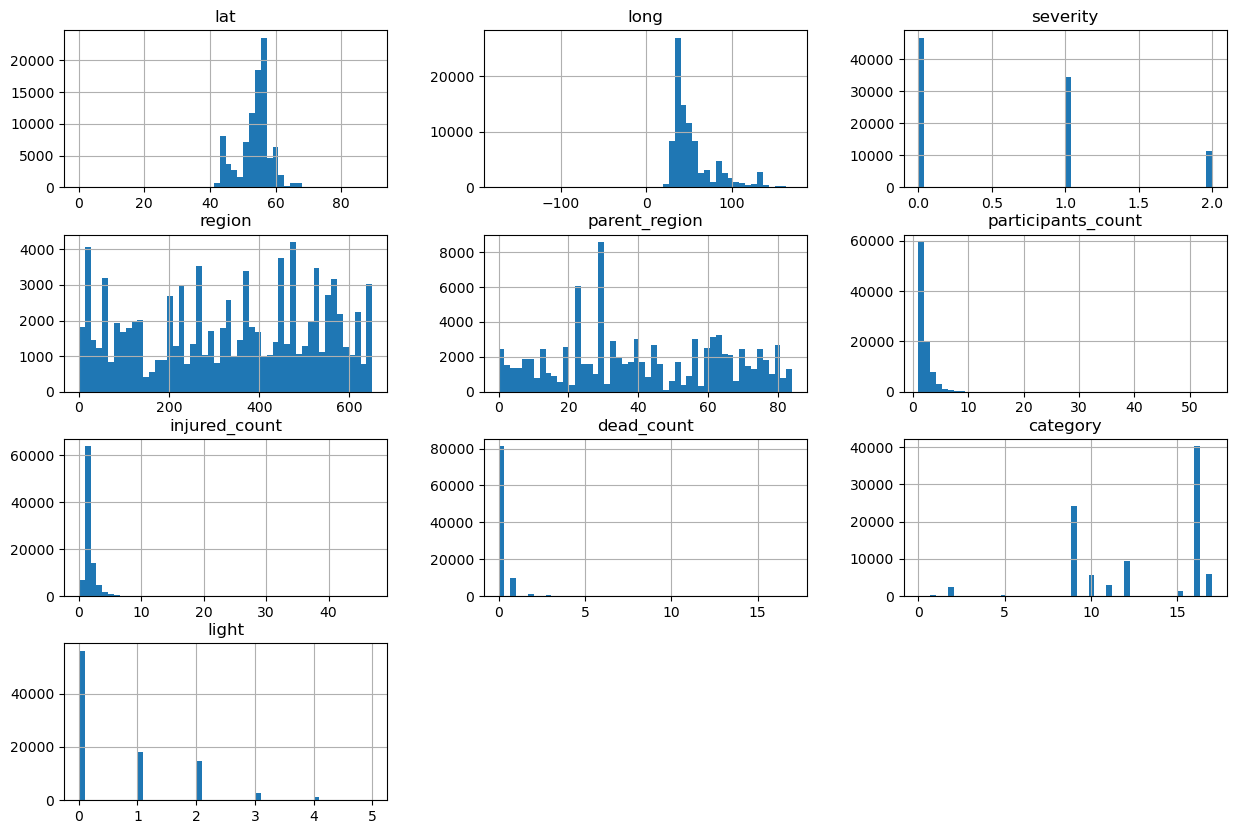

In [58]:
dfFull.hist(figsize=(15,10), bins=50);

## Создадим тепловую карту

<AxesSubplot:>

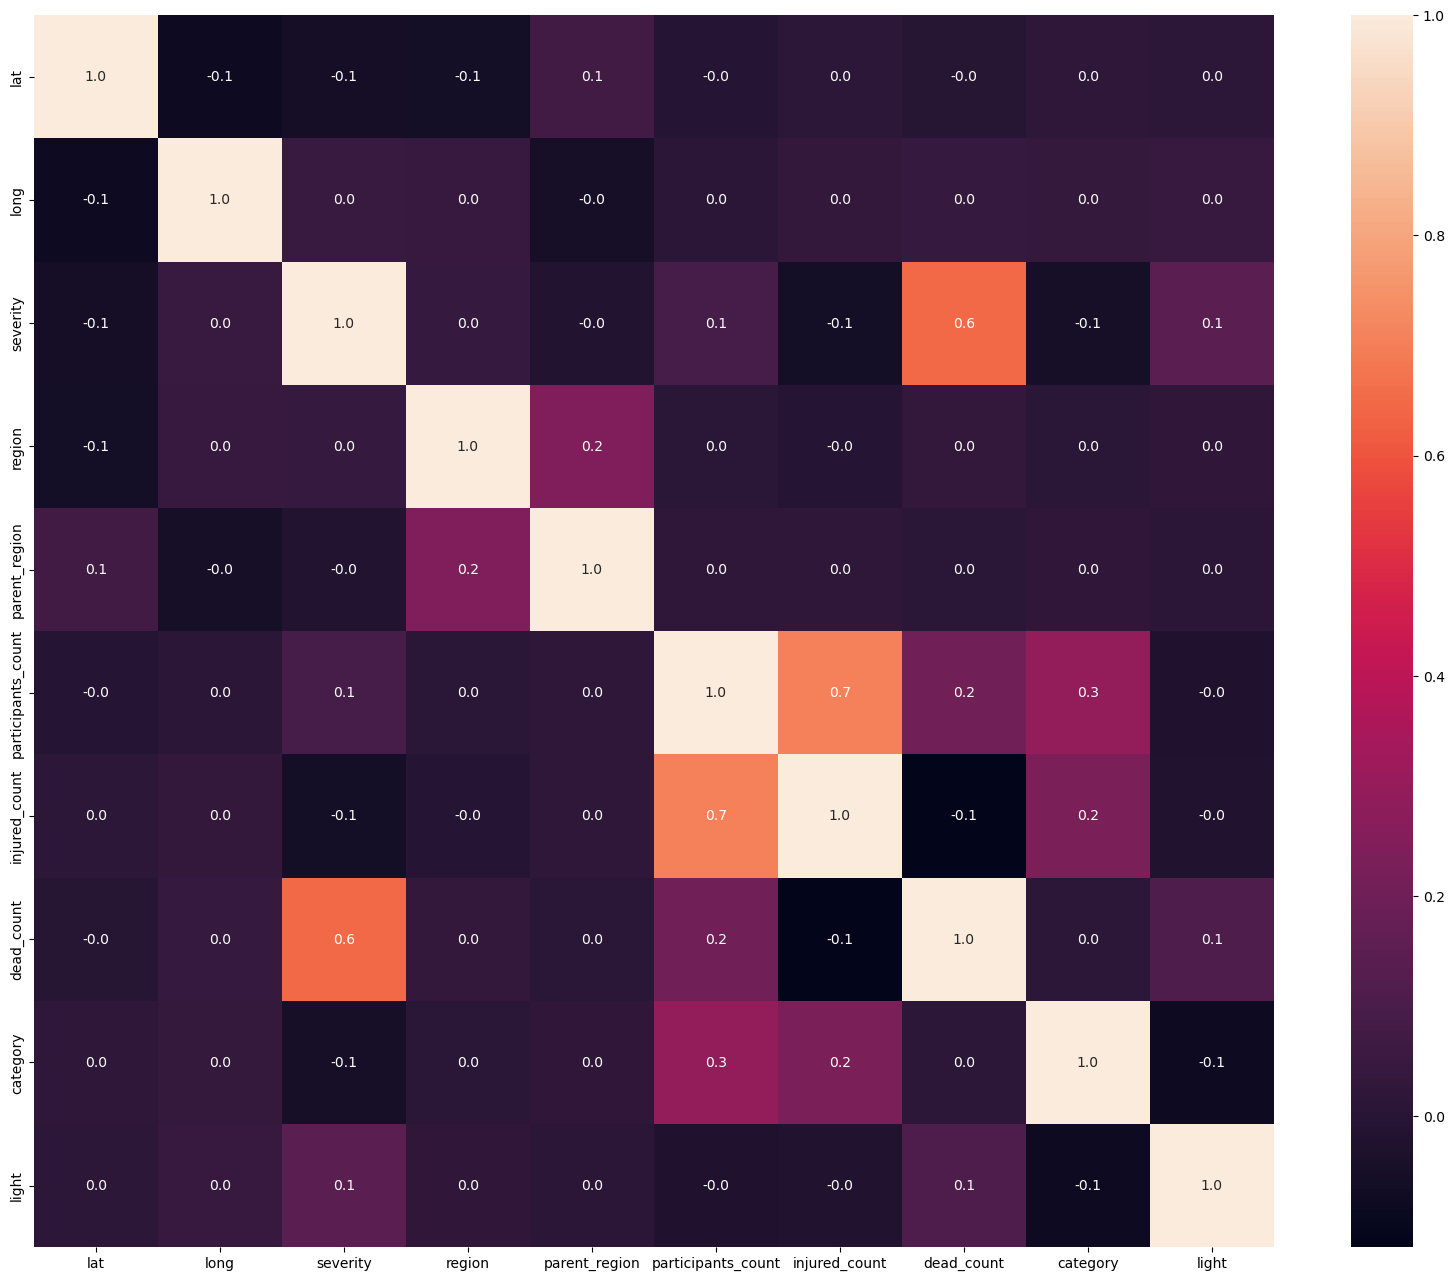

In [59]:
plt.figure(figsize=(20,16))
sns.heatmap(dfFull.corr(), annot=True, fmt=".1f")

## Кластеризация

In [60]:
dfFull.head()

,lat,long,severity,region,parent_region,participants_count,injured_count,dead_count,category,light
0,53.78,82.67,0,316,0,3,1,0,16,2
1,53.32,82.92,1,316,0,4,2,0,16,0
2,51.45,81.16,1,381,0,3,1,0,16,0
3,53.05,83.84,0,325,0,3,1,0,16,0
4,53.17,83.42,1,22,0,2,1,0,9,0


In [61]:
from sklearn.cluster import KMeans

In [62]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"
numObj = dfFull.lat[1]
toFixed(numObj, 2)
numObj

53.32

In [63]:
dfFull.isna().sum()

lat                   0
long                  0
severity              0
region                0
parent_region         0
participants_count    0
injured_count         0
dead_count            0
category              0
light                 0
dtype: int64

In [65]:
dfFull.shape[0]

92585

In [66]:
dfFull

,lat,long,severity,region,parent_region,participants_count,injured_count,dead_count,category,light
0,53.78,82.67,0,316,0,3,1,0,16,2
1,53.32,82.92,1,316,0,4,2,0,16,0
2,51.45,81.16,1,381,0,3,1,0,16,0
3,53.05,83.84,0,325,0,3,1,0,16,0
4,53.17,83.42,1,22,0,2,1,0,9,0
...,...,...,...,...,...,...,...,...,...,...
103810,52.37,115.53,1,512,11,2,1,0,9,0
103811,52.35,115.55,1,512,11,2,1,0,9,0
103812,52.37,115.54,1,512,11,1,1,0,12,2
103813,52.35,115.52,1,512,11,1,1,0,12,0


In [67]:
dfFull.lat.head(263)

0      53.78
1      53.32
2      51.45
3      53.05
4      53.17
       ...  
258    53.36
259    52.37
260    52.09
262    53.38
263    53.34
Name: lat, Length: 263, dtype: float64

In [69]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [70]:
kmeans.fit(dfFull)

KMeans(n_clusters=3, random_state=0)

In [71]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [72]:
y = kmeans.labels_

In [73]:
x = dfFull.values

<function matplotlib.pyplot.show(close=None, block=None)>

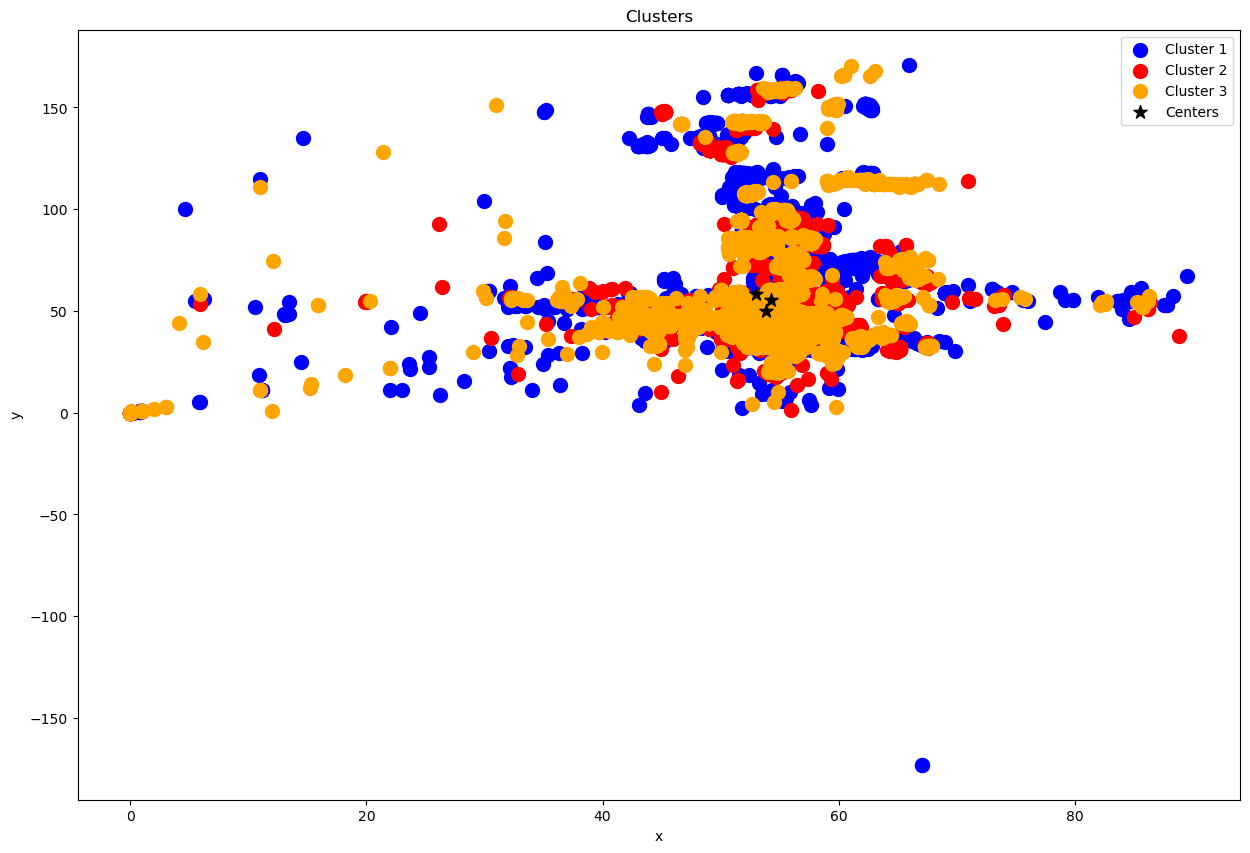

In [74]:
plt.rcParams["figure.figsize"] = (15,10)

plt.scatter(x[y == 0,0],x[y == 0,1],s=100,c='blue', label='Cluster 1')
plt.scatter(x[y == 1,0],x[y == 1,1],s=100,c='red', label='Cluster 2')
plt.scatter(x[y == 2,0],x[y == 2,1],s=100,c='orange', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",s=100,c='black', label='Centers')

plt.title('Clusters')
plt.xlabel('x')
plt.ylabel("y")
plt.legend()
plt.show

# Обучение моделей

## Подготовка данных


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x = dfFull.copy()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Дерево решений

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
clf = DecisionTreeClassifier(random_state=1)

In [81]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [82]:
y_pred = clf.predict(x_test)

In [83]:
accuracy_score(y_test, y_pred)

1.0

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11157
           1       1.00      1.00      1.00      7266
           2       1.00      1.00      1.00      9353

    accuracy                           1.00     27776
   macro avg       1.00      1.00      1.00     27776
weighted avg       1.00      1.00      1.00     27776



## Случайный лес

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(n_estimators=300, random_state = 1)

In [86]:
rf_cls.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1)

In [87]:
y_pred = rf_cls.predict(x_test)

In [88]:
accuracy_score(y_test, y_pred)

1.0

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11157
           1       1.00      1.00      1.00      7266
           2       1.00      1.00      1.00      9353

    accuracy                           1.00     27776
   macro avg       1.00      1.00      1.00     27776
weighted avg       1.00      1.00      1.00     27776



In [96]:
%%timeit

UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?


In [97]:
rf_cls = RandomForestClassifier(n_estimators=300, random_state = 1)

from sklearn.model_selection import GridSearchCV

params = {"n_estimators": [100,200,300,400,500]} 
# словарь с гиперпараметрами

grid = GridSearchCV(rf_cls, params, cv = 5, n_jobs = -1)

grid.fit(x_train, y_train) # обучение на кросс-валидации

grid.best_params_ # параметры лучшей модели

best_rf_cls = grid.best_estimator_ # лучший алгоритм

y_pred = best_rf_cls.predict(x_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11157
           1       1.00      1.00      1.00      7266
           2       1.00      1.00      1.00      9353

    accuracy                           1.00     27776
   macro avg       1.00      1.00      1.00     27776
weighted avg       1.00      1.00      1.00     27776

